# Regression in Data Analytics

![title](RegressionHeader.jpeg)

## Introduction
Regression analysis is used when you want to predict a continuous dependent variable from a number of independent variables. The independent variables used in regression can be either continuous or dichotomous. Independent variables with more than two levels can also be used in regression analyses, but they first must be converted into variables that have only two levels. Usually, regression analysis is used with naturally-occurring variables, as opposed to experimentally manipulated variables, although you can use regression with experimentally manipulated variables.

## Research questions
The main question that this research will answer is:
What is a regression and what can it be used for?

But to able to answer this, we first need to answer the subquestions:
- What kind of regressions are available?
- Over-fitting vs under-fitting vs correct-fit
- How can the different regressions be made in python?
- What does this look like with real data?
- Where is it being used currently?


## What kind of regressions are available?
There are a lot of different types of regressions available. Here are a few examples (“Generalized Linear Models,” n.d.):

#### Linear regression

Linear regression is the most simple regression of all. This one is close to the model function and follows (most of the time) the following formula (“Simple linear regression,” n.d.):
$$y_i = a + \beta x_i + \epsilon_i$$
![Linear regression](linearRegression.png)


#### Ridge regression

The simplest way to explain what this regression is, is by saying that the Ridge regression a "Variation of the Linear regression" is. When the Ridge regression is chosen above the Linear regression, that is because lambda can be changed in the Ridge regression, where that is not possible with the Linear regression. The general formula for this regression looks the following (“Ridge Regression for Better Usage,” n.d.):
$$\beta^{ridge} = min_{w} || X w - y||_2^2 + \lambda ||w||_2^2$$
![Ridge regression](ridgeRegression.png)


#### Bayesian regression

Bayesian regression is all most the same as the Linear regression, the big difference is the approach. This regressions follows the Bayesian statistical inference, meaning that the regression uses probability distributions rather than point estimates. The aim of Bayesian Regression is not to find the single “best” value of the model parameters, but rather to determine the posterior distribution for the model parameters. The general formula looks the following (“Introduction to Bayesian Linear Regression,” n.d.):
$$y \sim N ( \beta^T X, \sigma^2 I )$$
![Baysesian regression](bayesianRegression.png)


#### Polynominal regression

The most populair kind of regression is the polynominal regression. This one uses a parabolic function to represent a dataset. The general formula looks the following (“Polynomial Regression,” n.d.):
$$Y = \theta_0 + \theta_1 x + \theta_2 x^2 + ... + \theta_i x^i$$
![Polynominal regression](polynominalRegression.png)


#### Logistic regression
Logistic regression is estimating the parameters of a logistic model (a form of binary regression). Mathematically, a binary logistic model has a dependent variable with two possible values, such as pass/fail, win/lose, alive/dead or healthy/sick. The general formula looks the following (“Logistic regression,” n.d.):
$$f(y_i) = \ln{\dfrac{P(y_i)}{1 - P(y_i)}} = \beta_0 + \beta_1 x_{i1} + ... + \beta_n x_{i k}$$
![Logistic regression](logisticRegression.png)

But there are many more kinds of regressions!

## Overfitting vs underfitting vs correct fit
Depending on the kind of regression and the dataset you are using, fitting can become an important factor in training your model. When using a linear regression, fitting should not form a problem. But when using a polynomial regression, fitting can, and propably will, become a problem. Ofcourse, everyone want to have the error as small as possible, but this makes your model way to sensitve to new data and the results of the model can become unreliable. Below are examples of fitting a model (“7 Types of Regression Techniques you should know,” n.d.):
![Fitting](fitting.png)

In the left graph, underfitting is shown. This means that the model is not sensitve and has a too big of an error to represent the dataset. In the right graph, overfitting is shown. Here the error is practicly zero, but still the model is not able to represent the dataset correctly. In the middle, is a correct model. This model is able to represent all of the datapoint close enough to make good predictions.

## How can the different regressions be made in python?
Python is a very easy programming language, and much used within the data science area. Combined with a lot of plugins like pyplot and sklearn, Python is the prefect tool for data scientist.

### Linear regression

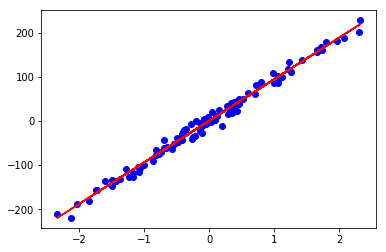

In [7]:
import operator
import numpy as np
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.datasets import make_regression, load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, BayesianRidge, LogisticRegression
from matplotlib import pyplot
import pandas as pd
import seaborn as sns

# Generate random data for the linear regression
X, y = make_regression(n_samples=100, n_features=1, noise=10)

# Make the regression
reg = LinearRegression().fit(X, y).predict(X)

# Plot regression
pyplot.scatter(X,y, color='blue')
pyplot.plot(X, reg, color='red')
pyplot.show()

### Ridge Regression

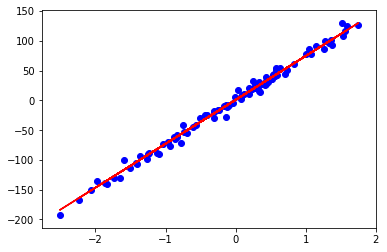

In [2]:
# Generate random data for the Ridge regressio
X, y = make_regression(n_samples=100, n_features=1, noise=7)

# Make the regression
kr = Ridge(alpha=1.0)
kr.fit(X, y)
y_pred = kr.predict(X)

# Plot regression
pyplot.plot(X, y_pred, color='red')
pyplot.scatter(X,y, color='blue')
pyplot.show()

### Bayesian regression

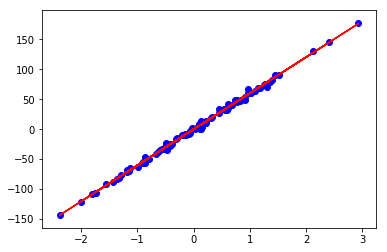

In [3]:
# Generate random data for the Ridge regressio
X, y = make_regression(n_samples=100, n_features=1, noise=3)

# Make regression
BR = BayesianRidge(compute_score=True)
BR.fit(X, y)
y_predict = BR.predict(X)

# Plot regression
pyplot.plot(X, y_predict, color='red')
pyplot.scatter(X,y, color='blue')
pyplot.show()

### Polynominal regression

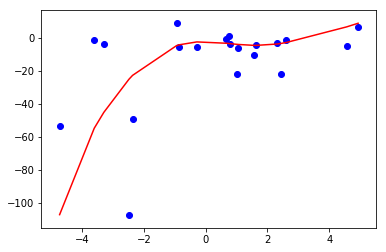

In [4]:
# Generate random data for the polynominal regression
np.random.seed(0)
X = 2 - 3 * np.random.normal(0, 1, 20)
y = X - 2 * (X ** 2) + 0.5 * (X ** 3) + np.random.normal(-3, 3, 20)

# transforming the data to include another axis
X = X[:, np.newaxis]
y = y[:, np.newaxis]

polynomial_features= PolynomialFeatures(degree=7)
x_poly = polynomial_features.fit_transform(X)

# Make the regression
model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X,y_poly_pred), key=sort_axis)
X, y_poly_pred = zip(*sorted_zip)

# Plot regression
pyplot.plot(X, y_poly_pred, color='red')
pyplot.scatter(X,y, color='blue')
pyplot.show()

## What does this look like with real data?
Below I have used a dataset that contains data about patients pregnancy, glucose level, blood pressure, insulin level, age, bmi, skin thickness and if the person is diabetic (“Pima Indians Diabetes Database,” n.d.). This dataset can be used to make a logistic regression. Below is shown how I made a model predicting if a person is a diabetic:

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


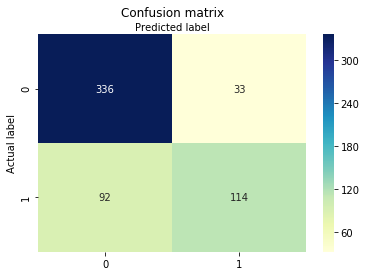

Accuracy: 0.782608695652174
Precision: 0.7755102040816326


In [5]:
# Definitions
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']

# Load dataset
pima = pd.read_csv("diabetes.csv", header=1, names=col_names)
X = pima[feature_cols]
y = pima.label
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

# Make regression
LG = LogisticRegression()
LG.fit(X_train,y_train)
y_pred = LG.predict(X_train)

# Plot classification
cnf_matrix = metrics.confusion_matrix(y_train, y_pred)
_, ax = pyplot.subplots()
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
pyplot.title('Confusion matrix', y=1.1)
pyplot.ylabel('Actual label')
pyplot.xlabel('Predicted label')
pyplot.show()

print("Accuracy:",metrics.accuracy_score(y_train, y_pred))
print("Precision:",metrics.precision_score(y_train, y_pred))

I used a confusion matrix to show how well the model is preforming; every point in the upper-left and lower-right corner are correctly predicted by the model. The other ones are not. This model is doing a pretty good job. It reached a accuracy of 78% and a precision of 77.5%! Ofcourse, with more data this model can preform much better, but still.

Below, I made an example of how this model could be used by people to predict diabetes:

In [9]:
# You may need to restart the kernel and rerun all of the code before this will work. 
# Make sure you have installed the following libraries using pip: sklearn, numpy, pandas, matplotlib and seaborn
# Definitions
pregnant = 0 # Times been pregnant
insulin = 0 # In U/ml
bmi = 21.6
age = 19
glucose = 124.2 # In mg/dl. Normal is between 72 and 180
bp = 89 # In mm Hq
pedigree = 0.5

# Predict using definitions
y_predict = LG.predict([[pregnant, insulin, bmi, age, glucose, bp, pedigree]])
if (y_predict[0] == 1):
    print('There is a big chance you have diabetes...')
    
else:
    print('"I predict that you do not have diabetes!" ~ AI"')

"I predict that you do not have diabetes!" ~ AI"


#### Ethics and data driven society

This model could become very usefull when we talk about a "data driven society". This model has many uses, from predicting if someone has diabetes without the use of a doctor, but also for preventing it. This last one is important, because you are free to fill in any data. This way, everyone can find the boundary of diabetes and so making awareness for the bad health of someone (or good health).

But the model cannot work everywhere, geographically speaking. In the EU, it could work very well. All of the data is reliable and, relatively, easy to access with the use of EHR (“Electronic health record,” n.d.). The same is probably true for America, but for countries in Afrika this will not be the case (“EHR implementation in South Africa: how do we get it right? - PubMed - NCBI,” n.d.). In Africa is lagging behind with the implementation of the critical medical toolkit. This model does need the EHR to preform at it's best, because in the EHR all of the needed data is collected and stored. 

Personally, I think we should implement this kind of model, but at all the differend medical fields. I am a diabetic myself since I was eight. When someone has diabetes or when diabetes is developing, there are a lot of nasty symptoms which cannot be prevented, but can become less annoying for the person (“4 Early Diabetes Symptoms & Signs in Men (Type 1 & 2),” n.d.). For example, nausea and thirstiness were my symptoms. When it was at it's worst, I could not get to school 3 out of the 5 days. I think, that this was not necessary if I could use this simple model/form.

However, this model is not able to predict if someone has type 1 or type 2 diabetes. It is possible to make such a model: Just feed it more data. But that introduces another problem; How much data from the EHR can you feed suchs a system? When it comes to my personal health, I do not really care about my privacy and data. It is for me more important to give my doctor as much data as (s)he needs to do the analysis, than to protect my privacy. Currently I am wearing a little device called: Freestyle Libre (“FreeStyle Libre Flash Glucose Monitoring - Abbott Diabetes,” n.d.). This device measures my glucose level every 5 minutes and saves it into the cloud. My doctor can login and see all these measurements. Since I am using this device, I am able to regulate my glucose levels much better and I am feeling better than ever before! So in my case, giving up a bit of my privacy, gives me the chance to feel much better

## Where is it being used currently?

As you can see, the applications for regressions can varied very much. So a logic question now is, where are regressions currently be used for? Or maybe a even better question: Where can regressions be used for? Here are some examples of real world applications (“What are some real-world applications of ‘simple’ linear regression? - Quora,” n.d.):
- Impact of SAT Score (or GPA) on College Admissions
- Impact of blood alcohol content on coordination
- Impact of rainfall amount on number fruits yielded
- Impact of product price on number of sales
- Electricity usage Vs Electricity bill
- Age Vs Health issues
- Years of experience Vs Salary

## Conclusion time!
There are a lot of types of regressions available:
- Linear: Mostly used when dealing with linear data
- Ridge: Used when the lambda expression needs to be changed
- Bayesian: Used for determining the posterior distribution
- Polynominal: Used most of the times
- Logistic: Used for classification
- And many more

Each type can easly be made with the right tools, like Pyhton combined with skLearn and pyplot. In this research paper, there is a model available with can predict if you are a diabetic or not, using data about pregnancy, insulin level, bmi, age, glucose level, bloodpresure and pedigree. But there are many other real world applications already for regressions.

There is the ethical side of using data in the medical sector. I think, that when people give up a little piece of their privacy that it will improve the overall health of an individual. 

At the end, when we talk about regression, there is one general description about it:
A regression is a model to able to predict a continuous dependent variable from a number of independent variables.

## Reference list
- Generalized Linear Models. (n.d.). Retrieved May 30, 2019, from https://scikit-learn.org/stable/modules/linear_model.html
- Simple linear regression. (n.d.). Retrieved May 30, 2019, from https://en.wikipedia.org/wiki/Simple_linear_regression
- Ridge Regression for Better Usage. (n.d.). Retrieved May 30, 2019, from https://towardsdatascience.com/ridge-regression-for-better-usage-2f19b3a202db?gi=408f880479f4
- Polynomial Regression. (n.d.). Retrieved May 30, 2019, from https://towardsdatascience.com/polynomial-regression-bbe8b9d97491?gi=2b77e7010566
- Introduction to Bayesian Linear Regression. (n.d.). Retrieved May 30, 2019, from https://towardsdatascience.com/introduction-to-bayesian-linear-regression-e66e60791ea7?gi=7abd4246001b
- Logistic regression. (n.d.). Retrieved May 30, 2019, from https://en.wikipedia.org/wiki/Logistic_regression
- 7 Types of Regression Techniques you should know. (n.d.). Retrieved May 30, 2019, from https://www.analyticsvidhya.com/blog/2015/08/comprehensive-guide-regression/
- Pima Indians Diabetes Database. (n.d.). Retrieved May 31, 2019, from https://www.kaggle.com/uciml/pima-indians-diabetes-database
- What are some real-world applications of “simple” linear regression? - Quora. (n.d.). Retrieved June 5, 2019, from https://www.quora.com/What-are-some-real-world-applications-of-simple-linear-regression
- EHR implementation in South Africa: how do we get it right? - PubMed - NCBI. (n.d.). Retrieved June 13, 2019, from https://www.ncbi.nlm.nih.gov/pubmed/20841716
- Electronic health record. (n.d.). Retrieved June 13, 2019, from https://en.wikipedia.org/wiki/Electronic_health_record
- 4 Early Diabetes Symptoms & Signs in Men (Type 1 & 2). (n.d.). Retrieved June 13, 2019, from https://www.medicinenet.com/diabetes_symptoms_in_men/article.htm
- FreeStyle Libre Flash Glucose Monitoring - Abbott Diabetes. (n.d.). Retrieved June 13, 2019, from https://www.freestylelibre.nl/
